Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt


Imports from sklearn

In [3]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


In [6]:
# autoreload
%load_ext autoreload
%autoreload 2

Import: This stops the annoying future warning messages

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Basic EDA

## Basic info on dataset: shape, info, head, tail, describe, nunique

In [5]:
neo = pd.read_csv('../data/neo.csv')
neo.shape

(90836, 10)

In [8]:
neo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [9]:
neo.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [10]:
neo.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [11]:
neo.describe

<bound method NDFrame.describe of              id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
2       2512244   512244 (2015 YE18)          0.722030          1.614507   
3       3596030          (2012 BV13)          0.096506          0.215794   
4       3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3763337           (2016 VX1)          0.026580          0.059435   
90832   3837603           (2019 AD3)          0.016771          0.037501   
90833  54017201           (2020 JP3)          0.031956          0.071456   
90834  54115824           (2021 CN5)          0.007321          0.016370   
90835  54205447           (2021 TW7)          0.039862          0.089133   

       relative_velocity  miss_distance orbiting_body

### Provide a summary of all numerical datatypes like int or float

In [16]:
neo.describe().T

,count,mean,std,min,25%,50%,75%,max
id,90836.0,1.438288e+07,2.087202e+07,2.000433e+06,3.448110e+06,3.748362e+06,3.884023e+06,5.427591e+07
est_diameter_min,90836.0,1.274321e-01,2.985112e-01,6.089126e-04,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
est_diameter_max,90836.0,2.849469e-01,6.674914e-01,1.361570e-03,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
relative_velocity,90836.0,4.806692e+04,2.529330e+04,2.033464e+02,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6.745533e+03,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
absolute_magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000e+00,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01


In [17]:
neo.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,90836.0,NaN,NaN,NaN,14382878.05216,20872018.353893,2000433.0,3448110.0,3748362.0,3884023.0,54275914.0
name,90836,27423,469219 Kamo`oalewa (2016 HO3),43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
est_diameter_min,90836.0,NaN,NaN,NaN,0.127432,0.298511,0.000609,0.019256,0.048368,0.143402,37.89265
est_diameter_max,90836.0,NaN,NaN,NaN,0.284947,0.667491,0.001362,0.043057,0.108153,0.320656,84.730541
relative_velocity,90836.0,NaN,NaN,NaN,48066.918918,25293.296961,203.346433,28619.020645,44190.11789,62923.604633,236990.128088
miss_distance,90836.0,NaN,NaN,NaN,37066546.030422,22352040.59919,6745.532516,17210820.235765,37846579.263426,56548996.451399,74798651.452197
orbiting_body,90836,1,Earth,90836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sentry_object,90836,1,False,90836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute_magnitude,90836.0,NaN,NaN,NaN,23.527103,2.894086,9.23,21.34,23.7,25.7,33.2
hazardous,90836,2,False,81996,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
neo.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

### isnull to find missing records in each column

In [13]:
neo.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

Percent of missing values in each column

In [15]:
(neo.isnull().sum()/(len(neo)))*100

id                    0.0
name                  0.0
est_diameter_min      0.0
est_diameter_max      0.0
relative_velocity     0.0
miss_distance         0.0
orbiting_body         0.0
sentry_object         0.0
absolute_magnitude    0.0
hazardous             0.0
dtype: float64

### Separates Numerical and Categorical variables

In [18]:
cat_cols=neo.select_dtypes(include=['object']).columns
num_cols = neo.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['name', 'orbiting_body'], dtype='object')
Numerical Variables:
['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']


# Quick Graphs

## Correlation Matrix Raw

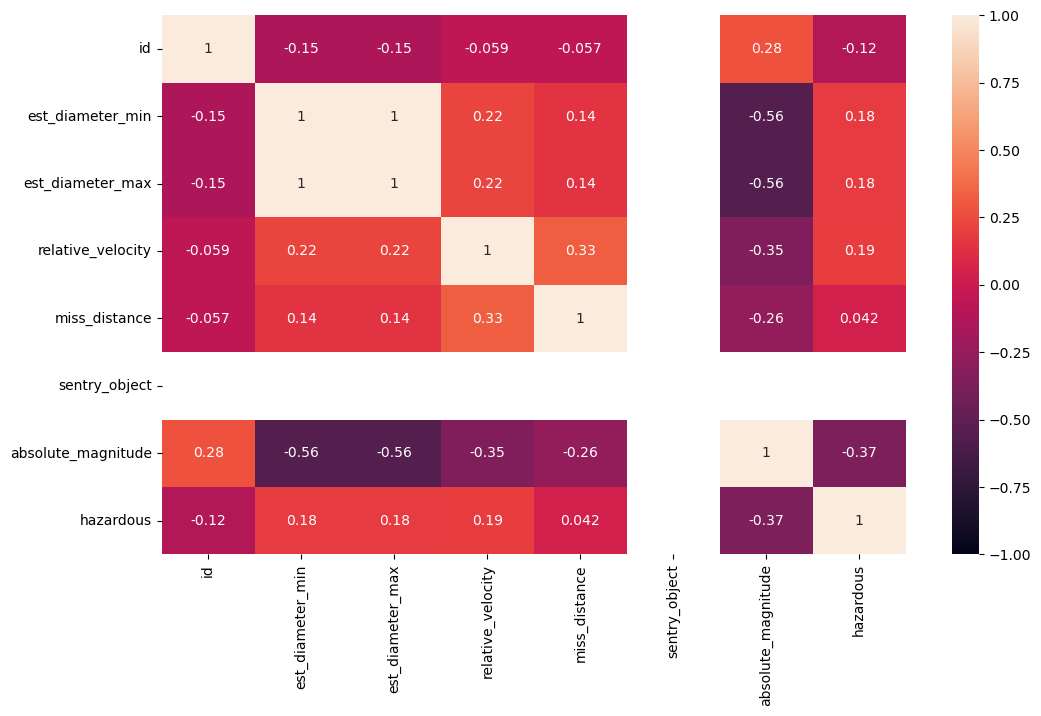

In [20]:
plt.figure(figsize = (12, 7))
sns.heatmap((neo).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

SNS pairplot

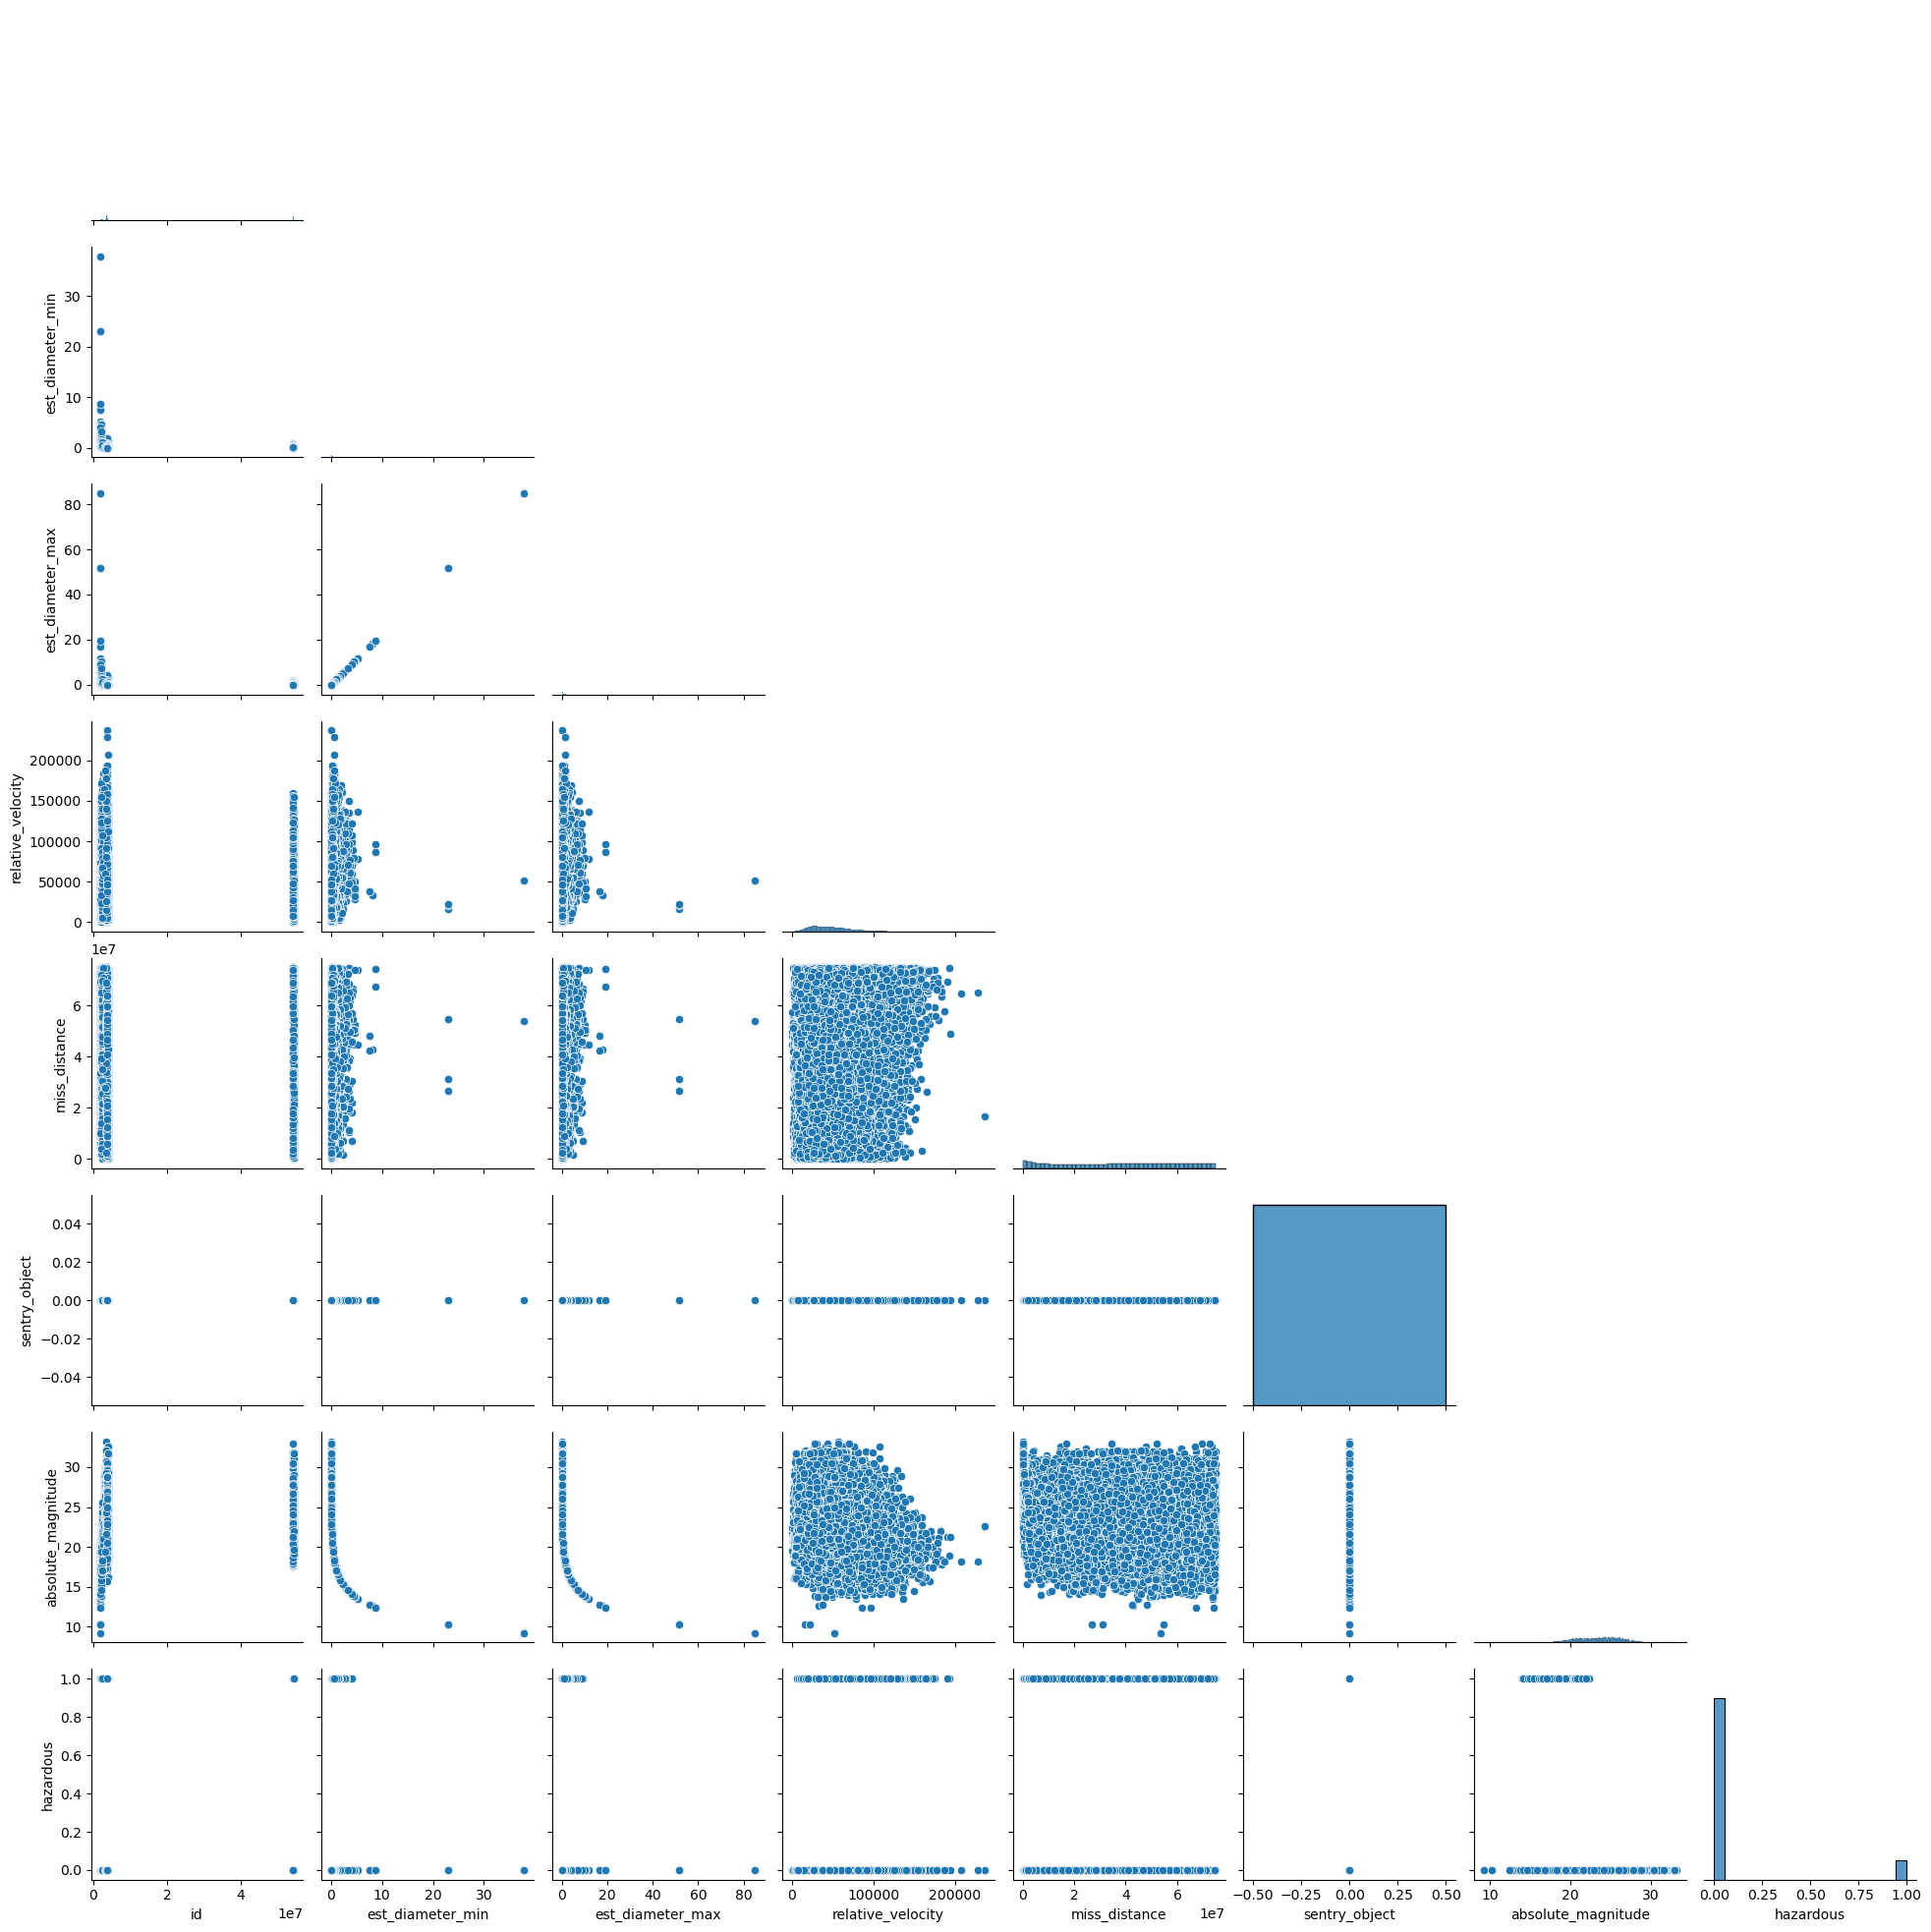

In [22]:
# created a pair plot to identify relationships between variables
sns.pairplot(data=neo, corner=True)